<a href="https://colab.research.google.com/github/Athishrs/MoviesApp/blob/main/chennai_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WEATHER FORECASTING

#Preparing the dataset




***Weather Forecating of chennai city over the past 40 years or so is done here.***

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
import pandas as pd


In [85]:
weather=pd.read_csv("/content/drive/MyDrive/chennai.csv",index_col="DATE")

In [86]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1980-01-01,IN020040900,"MADRAS MINAMBAKKAM, IN",0.00,75,NaN,68.0
1980-01-02,IN020040900,"MADRAS MINAMBAKKAM, IN",0.00,74,84.0,66.0
1980-01-03,IN020040900,"MADRAS MINAMBAKKAM, IN",0.00,76,84.0,66.0
1980-01-04,IN020040900,"MADRAS MINAMBAKKAM, IN",0.00,76,86.0,68.0
1980-01-05,IN020040900,"MADRAS MINAMBAKKAM, IN",0.00,77,84.0,70.0
...,...,...,...,...,...,...
2023-06-27,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,89,96.0,81.0
2023-06-28,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,90,NaN,82.0
2023-06-29,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,88,99.0,NaN


Fixing the Missing Values

In [87]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.368707
TAVG       0.000000
TMAX       0.155391
TMIN       0.271745
dtype: float64

In [88]:
core_weather=weather[['PRCP','TMAX','TMIN','TAVG']].copy()

In [89]:
core_weather.columns=["precip","temp_max","temp_min","temp_avg"]

Displaying the Dataset only with core features


In [90]:
core_weather

,precip,temp_max,temp_min,temp_avg
DATE,,,,
1980-01-01,0.00,NaN,68.0,75
1980-01-02,0.00,84.0,66.0,74
1980-01-03,0.00,84.0,66.0,76
1980-01-04,0.00,86.0,68.0,76
1980-01-05,0.00,84.0,70.0,77
...,...,...,...,...
2023-06-27,NaN,96.0,81.0,89
2023-06-28,NaN,NaN,82.0,90
2023-06-29,NaN,99.0,NaN,88


Manipulating the null values:-

In [91]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.368707
temp_max    0.155391
temp_min    0.271745
temp_avg    0.000000
dtype: float64

Listing the dates with null data.

In [92]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min,temp_avg
DATE,,,,
1980-01-22,NaN,88.0,NaN,77
1980-01-28,NaN,88.0,NaN,76
1980-02-04,NaN,86.0,NaN,76
1980-02-19,NaN,88.0,NaN,79
1980-02-28,NaN,95.0,NaN,81
...,...,...,...,...
2023-06-16,NaN,NaN,85.0,95
2023-06-26,NaN,NaN,81.0,89
2023-06-27,NaN,96.0,81.0,89


Replacing null values with zeros.

In [93]:
core_weather["precip"].value_counts()

0.00    6536
0.02     326
0.01     269
0.04     235
0.08     207
        ... 
2.00       1
2.82       1
1.07       1
0.73       1
6.22       1
Name: precip, Length: 287, dtype: int64

In [94]:
core_weather["precip"]=core_weather["precip"].fillna(0)

In [95]:
core_weather[pd.isnull(core_weather['temp_max'])]

,precip,temp_max,temp_min,temp_avg
DATE,,,,
1980-01-01,0.00,NaN,68.0,75
1980-01-06,0.00,NaN,72.0,78
1980-01-13,0.00,NaN,70.0,76
1980-01-16,0.00,NaN,70.0,77
1980-02-02,0.00,NaN,68.0,76
...,...,...,...,...
2023-06-20,1.61,NaN,76.0,85
2023-06-22,0.01,NaN,80.0,87
2023-06-24,0.02,NaN,78.0,89


In [96]:
core_weather[pd.isnull(core_weather['temp_min'])]

,precip,temp_max,temp_min,temp_avg
DATE,,,,
1980-01-22,0.0,88.0,NaN,77
1980-01-26,0.0,86.0,NaN,76
1980-01-28,0.0,88.0,NaN,76
1980-01-29,0.0,91.0,NaN,76
1980-01-31,0.0,88.0,NaN,77
...,...,...,...,...
2023-06-06,0.0,NaN,NaN,91
2023-06-10,0.0,106.0,NaN,90
2023-06-18,0.0,99.0,NaN,83


In [97]:
core_weather=core_weather.fillna(method='ffill')


In [98]:
core_weather["temp_max"]=core_weather["temp_max"].fillna(0)

In [99]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
temp_avg    0.0
dtype: float64

verifying the datatypes.

In [100]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
temp_avg      int64
dtype: object

In [101]:
core_weather.index

Index(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04', '1980-01-05',
       '1980-01-06', '1980-01-07', '1980-01-08', '1980-01-09', '1980-01-10',
       ...
       '2023-06-22', '2023-06-23', '2023-06-24', '2023-06-25', '2023-06-26',
       '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30', '2023-07-01'],
      dtype='object', name='DATE', length=15831)

Converting the index to date format

In [102]:
core_weather.index=pd.to_datetime(core_weather.index)

In [103]:
core_weather.index

DatetimeIndex(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04',
               '1980-01-05', '1980-01-06', '1980-01-07', '1980-01-08',
               '1980-01-09', '1980-01-10',
               ...
               '2023-06-22', '2023-06-23', '2023-06-24', '2023-06-25',
               '2023-06-26', '2023-06-27', '2023-06-28', '2023-06-29',
               '2023-06-30', '2023-07-01'],
              dtype='datetime64[ns]', name='DATE', length=15831, freq=None)

In [104]:
core_weather.index.year

Int64Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=15831)

Checking for missing data

In [105]:
core_weather.apply(lambda x:(x==9999)).sum()

precip      0
temp_max    0
temp_min    0
temp_avg    0
dtype: int64

#Ananlysing the weather data


<Axes: xlabel='DATE'>

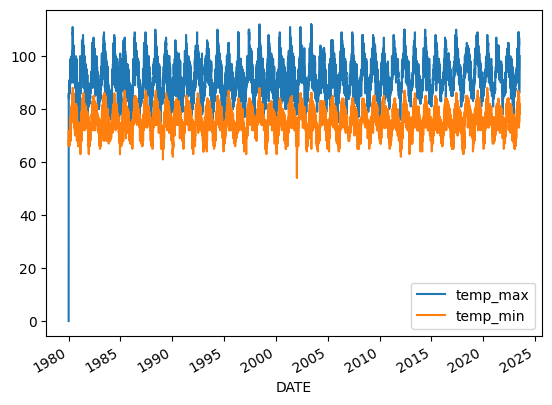

In [106]:
core_weather[['temp_max','temp_min']].plot()

                                      Temperature Analysis



<Axes: xlabel='DATE'>

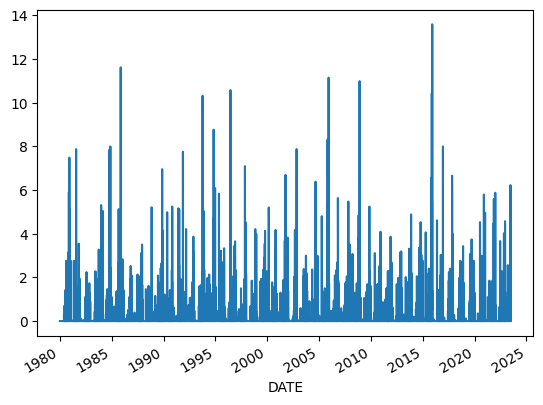

In [107]:
core_weather["precip"].plot()

                         
                          
                           
                            
                             
                              
                               
                              
                               
                                   precipitation Analysis


In [108]:
core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
1980    52.61
1981    55.31
1982    21.61
1983    49.62
1984    54.54
1985    79.45
1986    35.96
1987    42.48
1988    34.41
1989    49.29
1990    45.71
1991    46.34
1992    41.44
1993    65.79
1994    57.95
1995    57.51
1996    73.39
1997    61.99
1998    43.17
1999    40.55
2000    41.06
2001    53.40
2002    46.20
2003    33.26
2004    51.03
2005    83.01
2006    53.85
2007    48.23
2008    63.21
2009    51.76
2010    53.38
2011    60.56
2012    38.67
2013    38.42
2014    45.90
2015    95.61
2016    47.60
2017    57.98
2018    35.45
2019    50.75
2020    58.62
2021    80.60
2022    54.80
2023    12.60
Name: precip, dtype: float64

                              
                               
                                
                                 
                                  
                                   
                                    
                                     
                                      
                                       
                                        Rainfall Each year

#Training the Model





In [109]:
core_weather["target"]=core_weather.shift(-1)["temp_max"]

In [110]:
core_weather

,precip,temp_max,temp_min,temp_avg,target
DATE,,,,,
1980-01-01,0.00,0.0,68.0,75,84.0
1980-01-02,0.00,84.0,66.0,74,84.0
1980-01-03,0.00,84.0,66.0,76,86.0
1980-01-04,0.00,86.0,68.0,76,84.0
1980-01-05,0.00,84.0,70.0,77,84.0
...,...,...,...,...,...
2023-06-27,0.00,96.0,81.0,89,96.0
2023-06-28,0.00,96.0,82.0,90,99.0
2023-06-29,0.00,99.0,82.0,88,100.0


In [111]:
core_weather=core_weather.iloc[:-1,:].copy()

In [112]:
core_weather

,precip,temp_max,temp_min,temp_avg,target
DATE,,,,,
1980-01-01,0.00,0.0,68.0,75,84.0
1980-01-02,0.00,84.0,66.0,74,84.0
1980-01-03,0.00,84.0,66.0,76,86.0
1980-01-04,0.00,86.0,68.0,76,84.0
1980-01-05,0.00,84.0,70.0,77,84.0
...,...,...,...,...,...
2023-06-26,0.00,96.0,81.0,89,96.0
2023-06-27,0.00,96.0,81.0,89,96.0
2023-06-28,0.00,96.0,82.0,90,99.0


In [113]:
from sklearn.linear_model import Ridge

In [114]:
reg=Ridge(alpha=.1)

In [115]:
predictors=['precip','temp_max','temp_min','temp_avg']

Training set:-

In [116]:
train=core_weather.loc[:"2020-12-31"]

Testing set:-

In [117]:
test=core_weather.loc["2021-01-01":]

In [118]:
reg.fit(train[predictors],train["target"])

Ridge(alpha=0.1)

In [119]:
predictions=reg.predict(test[predictors])

In [121]:
from sklearn.metrics import mean_absolute_error

In [123]:
mean_absolute_error(test["target"],predictions)

1.3101122160716299

#Evaluating the Model

In [128]:
combined=pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis=1)
combined.columns=["actual","predictions"]

In [129]:
combined

,actual,predictions
DATE,,
2021-01-01,85.0,86.682070
2021-01-02,85.0,85.760859
2021-01-03,85.0,86.122621
2021-01-04,86.0,86.649122
2021-01-05,86.0,85.523272
...,...,...
2023-06-26,96.0,97.204429
2023-06-27,96.0,97.204429
2023-06-28,99.0,97.632087


<Axes: xlabel='DATE'>

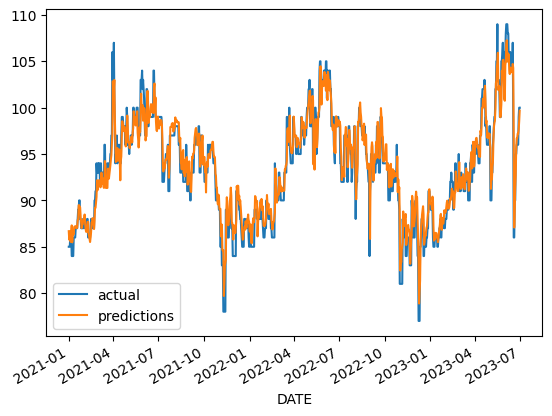

In [130]:
combined.plot()

In [132]:
reg.coef_

array([ 0.06039557,  0.60967169, -0.03294772,  0.46060536])

#Function to make predictions

In [133]:
def create_predictions(predictors,core_weather,reg):
  train=core_weather.loc[:"2020-12-31"]
  test=core_weather.loc["2021-01-01":]
  reg.fit(train[predictors],train["target"])
  predictions=reg.predict(test[predictors])
  error=mean_absolute_error(test["target"],predictions)
  combined=pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis=1)
  combined.columns=["actual","predictions"]
  return error,combined



In [134]:
core_weather["month_max"]=core_weather["temp_max"].rolling(30).mean()

In [135]:
core_weather

,precip,temp_max,temp_min,temp_avg,target,month_max
DATE,,,,,,
1980-01-01,0.00,0.0,68.0,75,84.0,NaN
1980-01-02,0.00,84.0,66.0,74,84.0,NaN
1980-01-03,0.00,84.0,66.0,76,86.0,NaN
1980-01-04,0.00,86.0,68.0,76,84.0,NaN
1980-01-05,0.00,84.0,70.0,77,84.0,NaN
...,...,...,...,...,...,...
2023-06-26,0.00,96.0,81.0,89,96.0,101.933333
2023-06-27,0.00,96.0,81.0,89,96.0,101.566667
2023-06-28,0.00,96.0,82.0,90,99.0,101.300000
